In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
plt.rc('figure', figsize=[10,7])
plt.rc('font', size=12)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=12)

In [3]:
@numba.njit()
def g(l):
    return 2*l+1

e_0=7.5

@numba.njit()
def E(l):
    return e_0*l*(l+1)

@numba.njit()
def Z_PH(b,n):
    x = 0
    for l in range(n):
        x += g(2*l)*np.exp(-b*E(2*l))
    return x

@numba.njit()
def Z_OH(b,n):
    x = 0
    for l in range(n):
        x += g(2*l+1)*np.exp(-b*E(2*l+1))
    return x

@numba.njit()
def p_PH(i,b,n):
    if i%2==1:
        return 0
    return g(i) / Z_PH(b,n) * np.exp(-b*E(i))

@numba.njit()
def p_OH(i,b,n):
    if i%2==0:
        return 0
    return g(i) / Z_OH(b,n) * np.exp(-b*E(i))

@numba.njit()
def E_avg_PH(b,n,m):
    x = 0
    for i in range(m):
        x += p_PH(i,b,n)*E(i)
    return x

@numba.njit()
def E_avg_OH(b,n,m):
    x = 0
    for i in range(m):
        x += p_OH(i,b,n)*E(i)
    return x

k_B = 0.086173324

@numba.njit()
def beta(T):
    return 1 / (k_B*T)

@numba.njit()
def F_PH(T,n):
    return -k_B*T*np.log(Z_PH(beta(T),n))

@numba.njit()
def F_OH(T,n):
    return -k_B*T*np.log(Z_OH(beta(T),n))

@numba.njit()
def S_PH(T,n,m):
    return (E_avg_PH(beta(T),n,m)-F_PH(T,n))/T

@numba.njit()
def S_OH(T,n,m):
    return (E_avg_OH(beta(T),n,m)-F_OH(T,n))/T

@numba.njit()
def E_avg_square_PH(b,n,m):
    x = 0
    for i in range(m):
        x += p_PH(i,b,n)*E(i)**2
    return x

@numba.njit()
def E_avg_square_OH(b,n,m):
    x = 0
    for i in range(m):
        x += p_OH(i,b,n)*E(i)**2
    return x

@numba.njit()
def C_PH(T,n,m):
    return (E_avg_square_PH(beta(T),n,m)-E_avg_PH(beta(T),n,m)**2)/(k_B*T**2)

@numba.njit()
def C_OH(T,n,m):
    return (E_avg_square_OH(beta(T),n,m)-E_avg_OH(beta(T),n,m)**2)/(k_B*T**2)

In [4]:
%timeit Z_PH(1,100)

The slowest run took 5.62 times longer than the fastest. This could mean that an intermediate result is being cached.
7.73 µs ± 7.19 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit E_avg_OH(beta(2),1000,1000)

22.9 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit C_OH(beta(2),1000,1000)

45.4 ms ± 808 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
X1 = np.arange(1,501)
Y1 = [E_avg_OH(beta(T),1000,1000) for T in X1]
Y2 = [E_avg_PH(beta(T),1000,1000) for T in X1]

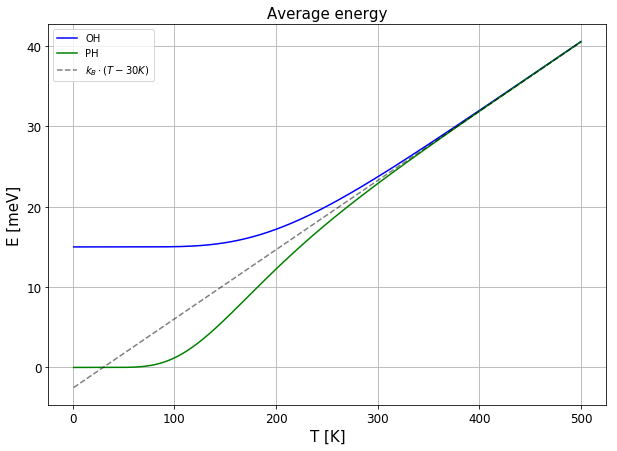

In [8]:
plt.title('Average energy')
plt.plot(X1,Y1,'b',label="OH")
plt.plot(X1,Y2,'g',label="PH")
plt.plot(X1,[k_B*(T-30) for T in X1],'--k',alpha=0.5,label="$k_B\cdot (T - 30 K)$")
plt.xlabel('T [K]')
plt.ylabel('E [meV]')
plt.legend()
plt.grid(True)
#plt.savefig("hw8_average_energy.pdf", bbox_inches='tight')
plt.show()

In [9]:
X2 = np.arange(1,501)
Y3 = [F_OH(T,1000) for T in X2]
Y4 = [F_PH(T,1000) for T in X2]

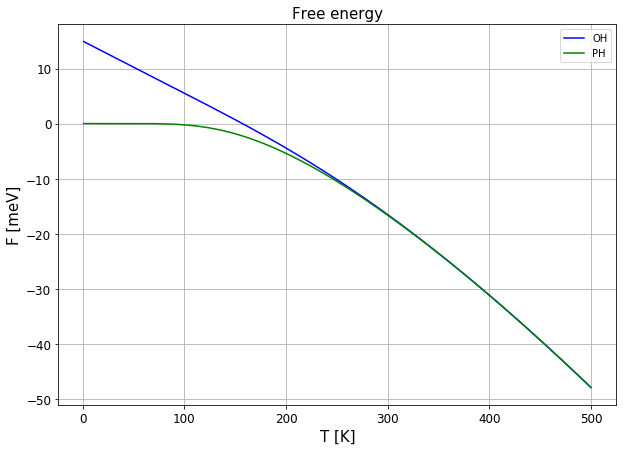

In [10]:
plt.title('Free energy')
plt.plot(X2,Y3,'b',label="OH")
plt.plot(X2,Y4,'g',label="PH")
plt.xlabel('T [K]')
plt.ylabel('F [meV]')
plt.legend()
plt.grid(True)
#plt.savefig("hw8_free_energy.pdf", bbox_inches='tight')
plt.show()

In [11]:
X3 = np.arange(1,501)
Y5 = [S_OH(T,1000,1000)/k_B for T in X3]
Y6 = [S_PH(T,1000,1000)/k_B for T in X3]

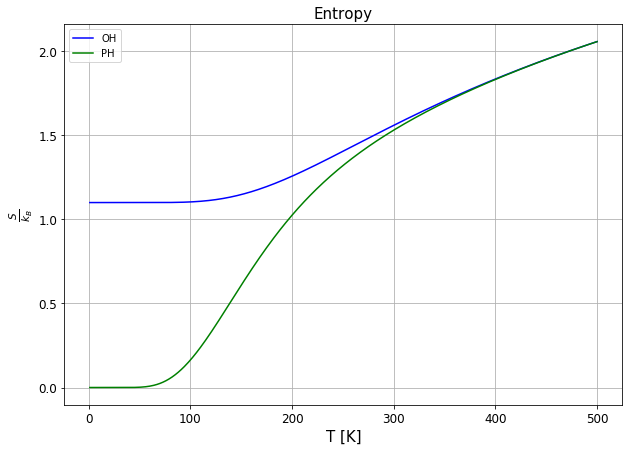

In [12]:
plt.title('Entropy')
plt.plot(X3,Y5,'b',label="OH")
plt.plot(X3,Y6,'g',label="PH")
plt.xlabel('T [K]')
plt.ylabel('$\\frac{S}{k_B}$')
plt.legend()
plt.grid(True)
#plt.savefig("hw8_entropy.pdf", bbox_inches='tight')
plt.show()

In [13]:
X4 = np.arange(1,501)
Y7 = [C_OH(T,1000,1000)/k_B for T in X4]
Y8 = [C_PH(T,1000,1000)/k_B for T in X4]

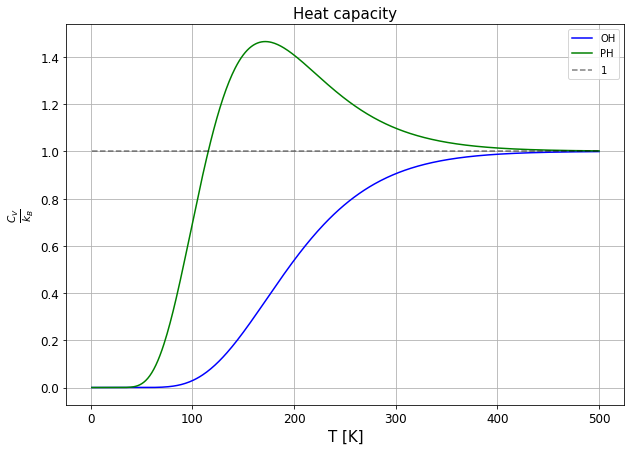

In [14]:
plt.title('Heat capacity')
plt.plot(X4,Y7,'b',label="OH")
plt.plot(X4,Y8,'g',label="PH")
plt.plot(X4,[1 for T in X4],'--k',alpha=0.5,label="$1$")
plt.xlabel('T [K]')
plt.ylabel('$\\frac{C_V}{k_B}$')
plt.legend()
plt.grid(True)
#plt.savefig("hw8_heat_capacity.pdf", bbox_inches='tight')
plt.show()